> 순환신경망 minor topics (2) 

# 강의영상 

> <https://youtube.com/playlist?list=PLQqh36zP38-wy8fev22UV1QK5yfTgMXm4>

# imports

In [242]:
import torch
import pandas as pd
import matplotlib.pyplot as plt 
from fastai.text.all import *
import pytorch_lightning as pl 

# Define some funtions

In [3]:
def f(txt,mapping):
    return [mapping[key] for key in txt] 
sig = torch.nn.Sigmoid()
soft = torch.nn.Softmax(dim=1)
tanh = torch.nn.Tanh()

# 똑같은 코드들: `torch.nn.LSTM`

## data: hi?hello!!

In [52]:
txt = list('hi?hello!!')*100 
txt_x = txt[:-1]
txt_y = txt[1:]

In [51]:
mapping = {'!':0, '?':1,'h':2,'i':3,'e':4,'l':5,'o':6} 
x= torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float().to("cuda:0")
y= torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float().to("cuda:0")

## 세트1: _water의 생략 

`-` 코드1: 정석코드 

In [55]:
torch.manual_seed(43052)
lstm = torch.nn.LSTM(7,4).to("cuda:0")

In [56]:
_water = torch.zeros(1,4).to("cuda:0")
lstm(x, (_water,_water))

(tensor([[-0.1547,  0.0673,  0.0695,  0.1563],
         [-0.0786, -0.1430, -0.0250,  0.1189],
         [-0.0300, -0.2256, -0.1324,  0.1439],
         ...,
         [-0.0723,  0.0620,  0.1913,  0.2015],
         [-0.1155,  0.0746,  0.1747,  0.2938],
         [-0.2350, -0.1559, -0.1093,  0.2682]], device='cuda:0',
        grad_fn=<SqueezeBackward1>),
 (tensor([[-0.2350, -0.1559, -0.1093,  0.2682]], device='cuda:0',
         grad_fn=<SqueezeBackward1>),
  tensor([[-0.4451, -0.2456, -0.1900,  0.6232]], device='cuda:0',
         grad_fn=<SqueezeBackward1>)))

`-` 코드2: _water 는 사실 없어도 괜찮았어.. 

In [57]:
torch.manual_seed(43052)
lstm = torch.nn.LSTM(7,4).to("cuda:0")

In [59]:
lstm(x)

(tensor([[-0.1547,  0.0673,  0.0695,  0.1563],
         [-0.0786, -0.1430, -0.0250,  0.1189],
         [-0.0300, -0.2256, -0.1324,  0.1439],
         ...,
         [-0.0723,  0.0620,  0.1913,  0.2015],
         [-0.1155,  0.0746,  0.1747,  0.2938],
         [-0.2350, -0.1559, -0.1093,  0.2682]], device='cuda:0',
        grad_fn=<SqueezeBackward1>),
 (tensor([[-0.2350, -0.1559, -0.1093,  0.2682]], device='cuda:0',
         grad_fn=<SqueezeBackward1>),
  tensor([[-0.4451, -0.2456, -0.1900,  0.6232]], device='cuda:0',
         grad_fn=<SqueezeBackward1>)))

## 세트2: x.shape = ($L$, $H_{in}$) or ($L$,$N$,$H_{in}$) 

`-` 파라메터 설명 

- $L$ = sequece length = 시계열의 길이 = 간장을 몇 년 전통으로 이어갈지 
- $N$ = batch size = 전체데이터는 몇 개의 시계열이 있는지 = 전체 데이터를 몇개의 시계열로 쪼갤지 <-- 왜 이걸 해야해? 
- $H_{in}$ = input_size = 시점을 고정하였을 경우 입력자료의 차원 = 입력시계열이 시점별로 몇개의 변수로 나타내어 지는지? = 만약에 원핫인코딩으로 단어를 정리하면 단어수를 의미함 



`-` 코드2: _water 는 사실 없어도 괜찮았어.. 

In [71]:
torch.manual_seed(43052)
lstm = torch.nn.LSTM(7,4).to("cuda:0")

In [72]:
lstm(x)

(tensor([[-0.1547,  0.0673,  0.0695,  0.1563],
         [-0.0786, -0.1430, -0.0250,  0.1189],
         [-0.0300, -0.2256, -0.1324,  0.1439],
         ...,
         [-0.0723,  0.0620,  0.1913,  0.2015],
         [-0.1155,  0.0746,  0.1747,  0.2938],
         [-0.2350, -0.1559, -0.1093,  0.2682]], device='cuda:0',
        grad_fn=<SqueezeBackward1>),
 (tensor([[-0.2350, -0.1559, -0.1093,  0.2682]], device='cuda:0',
         grad_fn=<SqueezeBackward1>),
  tensor([[-0.4451, -0.2456, -0.1900,  0.6232]], device='cuda:0',
         grad_fn=<SqueezeBackward1>)))

`-` 코드3: x의 차원은 사실 엄밀하게는 ($L$,$N$,$H_{in}$) 와 같다... 

In [73]:
torch.manual_seed(43052)
lstm = torch.nn.LSTM(7,4).to("cuda:0")

In [74]:
lstm(x.reshape(999,1,7))

(tensor([[[-0.1547,  0.0673,  0.0695,  0.1563]],
 
         [[-0.0786, -0.1430, -0.0250,  0.1189]],
 
         [[-0.0300, -0.2256, -0.1324,  0.1439]],
 
         ...,
 
         [[-0.0723,  0.0620,  0.1913,  0.2015]],
 
         [[-0.1155,  0.0746,  0.1747,  0.2938]],
 
         [[-0.2350, -0.1559, -0.1093,  0.2682]]], device='cuda:0',
        grad_fn=<CudnnRnnBackward0>),
 (tensor([[[-0.2350, -0.1559, -0.1093,  0.2682]]], device='cuda:0',
         grad_fn=<CudnnRnnBackward0>),
  tensor([[[-0.4451, -0.2456, -0.1900,  0.6232]]], device='cuda:0',
         grad_fn=<CudnnRnnBackward0>)))

`-` 코드4: `batch_first=True`옵션을 사용하여 lstm을 만든경우 

In [75]:
torch.manual_seed(43052)
lstm = torch.nn.LSTM(7,4,batch_first=True).to("cuda:0")

In [77]:
lstm(x.reshape(1,999,7))

(tensor([[[-0.1547,  0.0673,  0.0695,  0.1563],
          [-0.0786, -0.1430, -0.0250,  0.1189],
          [-0.0300, -0.2256, -0.1324,  0.1439],
          ...,
          [-0.0723,  0.0620,  0.1913,  0.2015],
          [-0.1155,  0.0746,  0.1747,  0.2938],
          [-0.2350, -0.1559, -0.1093,  0.2682]]], device='cuda:0',
        grad_fn=<CudnnRnnBackward0>),
 (tensor([[[-0.2350, -0.1559, -0.1093,  0.2682]]], device='cuda:0',
         grad_fn=<CudnnRnnBackward0>),
  tensor([[[-0.4451, -0.2456, -0.1900,  0.6232]]], device='cuda:0',
         grad_fn=<CudnnRnnBackward0>)))

## 세트3: hidden.shape = ($D\times$ `num_layers`, $H_{out}$) or ($D\times$ `num_layers`, $N$, $H_{out}$) 

`-` 파라메터 설명 

- $D$ = 2 if bidirectional=True otherwise 1 = 양방향이면 2, 단방향이면 1 (우리는 단방향만 배움) 
- `num_layres` = 중첩된 RNN일 경우 (우리는 중첩을 안시켰음) 
- $N$ = batch size = 전체데이터는 몇 개의 시계열이 있는지 = 전체 데이터를 몇개의 시계열로 쪼갤지 <-- 왜 이걸 해야해? 
- $H_{out}$ = 히든노드의 수

`-` 코드5: x.shape = ($L$,$1$,$H_{in}$) $\to$ hidden.shape = ($1$,$1$,$H_{out}$)

In [82]:
torch.manual_seed(43052)
lstm = torch.nn.LSTM(7,4).to("cuda:0")

In [90]:
_water = torch.zeros(1,1,4).to("cuda:0") 
lstm(x.reshape(999,1,7),(_water,_water))

(tensor([[[-0.1547,  0.0673,  0.0695,  0.1563]],
 
         [[-0.0786, -0.1430, -0.0250,  0.1189]],
 
         [[-0.0300, -0.2256, -0.1324,  0.1439]],
 
         ...,
 
         [[-0.0723,  0.0620,  0.1913,  0.2015]],
 
         [[-0.1155,  0.0746,  0.1747,  0.2938]],
 
         [[-0.2350, -0.1559, -0.1093,  0.2682]]], device='cuda:0',
        grad_fn=<CudnnRnnBackward0>),
 (tensor([[[-0.2350, -0.1559, -0.1093,  0.2682]]], device='cuda:0',
         grad_fn=<CudnnRnnBackward0>),
  tensor([[[-0.4451, -0.2456, -0.1900,  0.6232]]], device='cuda:0',
         grad_fn=<CudnnRnnBackward0>)))

`-` 사실 _water.shape = (1,$H_{out}$) 에서 1은 observation의 차원을 의미하는게 아님 (그런데 대충 그렇게 생각해도 무방함) 

- 한 시점의 콩물에 대하여 양방향으로 간장을 만들면 _water.shape = (2,h) 
- 한 시점의 콩물에 대하여 3중첩으로 간장을 만들면 _water.shape = (3,h) 
- 한 시점의 콩물에 대하여 3중첩간장을 양방향으로 만들면 _water.shape = (6,h) 

# 똑같은 코드들: `torch.nn.LSTMCell`

## data: hi?hello!!

In [91]:
txt = list('hi?hello!!')*100 
txt_x = txt[:-1]
txt_y = txt[1:]

In [92]:
mapping = {'!':0, '?':1,'h':2,'i':3,'e':4,'l':5,'o':6} 
x= torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float().to("cuda:0")
y= torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float().to("cuda:0")

## 세트1: _water의 생략 

`-` 코드1: 정석코드 

In [93]:
torch.manual_seed(43052) 
lstmcell = torch.nn.LSTMCell(7,4).to("cuda:0") 

In [99]:
xt = x[[1]]
_water = torch.zeros(1,4).to("cuda:0")
xt.shape, _water.shape

(torch.Size([1, 7]), torch.Size([1, 4]))

In [98]:
lstmcell(xt,(_water,_water))

(tensor([[-0.0290, -0.1758, -0.0537,  0.0598]], device='cuda:0',
        grad_fn=<ThnnFusedLstmCellBackward0>),
 tensor([[-0.0582, -0.4566, -0.1256,  0.1922]], device='cuda:0',
        grad_fn=<ThnnFusedLstmCellBackward0>))

`-` 코드2: _water의 생략

In [100]:
torch.manual_seed(43052) 
lstmcell = torch.nn.LSTMCell(7,4).to("cuda:0") 

In [101]:
xt = x[[1]]
xt.shape

torch.Size([1, 7])

In [102]:
lstmcell(xt)

(tensor([[-0.0290, -0.1758, -0.0537,  0.0598]], device='cuda:0',
        grad_fn=<ThnnFusedLstmCellBackward0>),
 tensor([[-0.0582, -0.4566, -0.1256,  0.1922]], device='cuda:0',
        grad_fn=<ThnnFusedLstmCellBackward0>))

## 세트2: xt.shape = ($N$,$H_{in}$) or ($H_{in}$)

`-` 코드2: _water의 생략

In [103]:
torch.manual_seed(43052) 
lstmcell = torch.nn.LSTMCell(7,4).to("cuda:0") 

In [104]:
xt = x[[1]]
xt.shape

torch.Size([1, 7])

In [105]:
lstmcell(xt)

(tensor([[-0.0290, -0.1758, -0.0537,  0.0598]], device='cuda:0',
        grad_fn=<ThnnFusedLstmCellBackward0>),
 tensor([[-0.0582, -0.4566, -0.1256,  0.1922]], device='cuda:0',
        grad_fn=<ThnnFusedLstmCellBackward0>))

`-` 코드3: 

In [103]:
torch.manual_seed(43052) 
lstmcell = torch.nn.LSTMCell(7,4).to("cuda:0") 

In [106]:
xt = x[1]
xt.shape

torch.Size([7])

In [107]:
lstmcell(xt)

(tensor([-0.0290, -0.1758, -0.0537,  0.0598], device='cuda:0',
        grad_fn=<SqueezeBackward1>),
 tensor([-0.0582, -0.4566, -0.1256,  0.1922], device='cuda:0',
        grad_fn=<SqueezeBackward1>))

## 세트3: hidden.shape = ($N$,$H_{out}$) or ($H_{out}$)

`-` 코드4: xt.shape = ($H_{in}$) $\to$ _water.shape = $(H_{out})$

In [109]:
torch.manual_seed(43052) 
lstmcell = torch.nn.LSTMCell(7,4).to("cuda:0") 

In [113]:
xt = x[1]
_water = torch.zeros(4).to("cuda:0")
xt.shape,_water.shape

(torch.Size([7]), torch.Size([4]))

In [114]:
lstmcell(xt, (_water,_water))

(tensor([-0.0290, -0.1758, -0.0537,  0.0598], device='cuda:0',
        grad_fn=<SqueezeBackward1>),
 tensor([-0.0582, -0.4566, -0.1256,  0.1922], device='cuda:0',
        grad_fn=<SqueezeBackward1>))

# Summary 

## 똑같은 코드들 정리 

`-` 원래 1은 단순히 observation의 차원이 아니다. 즉 ${\bf X}_{n \times p}$에서 $n$에 대응하는 차원으로 생각할 수 없다. 

`-` 그런데 (1) 단방향 (2) 조각내지 않은 시계열 (3) 중첩하지 않은 순환망에 한정하여서는 observation 처럼 생각해도 무방하다. <-- 엄밀하게는 이게 위험한 생각임. 하지만 정식으로 모두 따지려면 너무 헷갈림 

## 실제구현시 기억할 것 

`-` 현실적으로 (1)-(3)이 아닌 조건에서는 Cell 단위로 연산을 이용할 일이 없다. (느리거든요) // 그냥 이해용으로 구현 

`-` torch.nn.RNN 혹은 torch.nn.LSTM 으로 네트워크를 구성할시 _water의 dim을 명시할 일도 없다. 

`-` 오로지 고려해야 할 것은 입력시계열을 조각낼지 조각내지 않을지 

# 조각난 시계열로 학습 

## data 

In [118]:
txt = list('hi!')*3 + list('hi?')*3 

## 조각내지 않은 시계열 

In [165]:
txt_x = txt[:-1] 
txt_y = txt[1:] 

In [166]:
mapping = {'!':0, '?':1, 'h':2, 'i':3} 
x = torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float().to("cuda:0")
y = torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float().to("cuda:0")

In [167]:
torch.manual_seed(43052) 
lstm = torch.nn.LSTM(4,10).to("cuda:0")
linr = torch.nn.Linear(10,4).to("cuda:0")

In [168]:
loss_fn = torch.nn.CrossEntropyLoss() 
optimizr = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)

In [169]:
for epoc in range(100):
    ## 1 
    hidden, _ = lstm(x) 
    output = linr(hidden) 
    ## 2 
    loss = loss_fn(output,y) 
    ## 3 
    loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

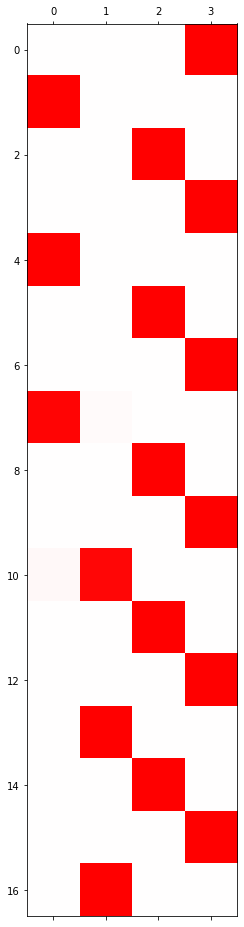

In [171]:
hidden, _ = lstm(x)
plt.matshow(soft(linr(hidden)).to("cpu").data,cmap='bwr',vmin=-1,vmax=1)

## 조각난 시계열 

In [177]:
txt1= txt[:9]
txt2= txt[9:]

In [178]:
txt1,txt2

(['h', 'i', '!', 'h', 'i', '!', 'h', 'i', '!'],
 ['h', 'i', '?', 'h', 'i', '?', 'h', 'i', '?'])

In [179]:
txt1_x = txt1[:-1] 
txt1_y = txt1[1:] 
txt2_x = txt2[:-1] 
txt2_y = txt2[1:] 

In [180]:
mapping = {'!':0, '?':1, 'h':2, 'i':3} 
x1 = torch.nn.functional.one_hot(torch.tensor(f(txt1_x,mapping))).float().to("cuda:0")
y1 = torch.nn.functional.one_hot(torch.tensor(f(txt1_y,mapping))).float().to("cuda:0")
x2 = torch.nn.functional.one_hot(torch.tensor(f(txt2_x,mapping))).float().to("cuda:0")
y2 = torch.nn.functional.one_hot(torch.tensor(f(txt2_y,mapping))).float().to("cuda:0")

In [181]:
x1.shape, y1.shape, x2.shape, y2.shape

(torch.Size([8, 4]),
 torch.Size([8, 4]),
 torch.Size([8, 4]),
 torch.Size([8, 4]))

In [182]:
xx = torch.stack([x1,x2],axis=1)
yy = torch.stack([y1,y2],axis=1)
xx.shape, yy.shape

(torch.Size([8, 2, 4]), torch.Size([8, 2, 4]))

In [183]:
torch.manual_seed(43052) 
lstm = torch.nn.LSTM(4,10).to("cuda:0")
linr = torch.nn.Linear(10,4).to("cuda:0")

In [184]:
loss_fn = torch.nn.CrossEntropyLoss() 
optimizr = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)

In [185]:
for epoc in range(100):
    ## 1 
    hidden, _ = lstm(xx) 
    output = linr(hidden) 
    ## 2 
    loss = loss_fn(output[:,0,:],yy[:,0,:]) + loss_fn(output[:,1,:],yy[:,1,:])
    ## 3 
    loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

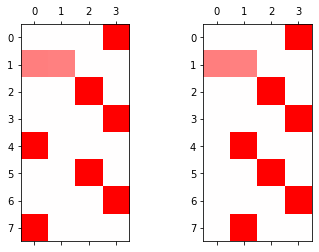

In [186]:
fig , ax = plt.subplots(1,2) 
ax[0].matshow(soft(output[:,0,:]).to("cpu").data,cmap='bwr',vmin=-1,vmax=1)
ax[1].matshow(soft(output[:,1,:]).to("cpu").data,cmap='bwr',vmin=-1,vmax=1)

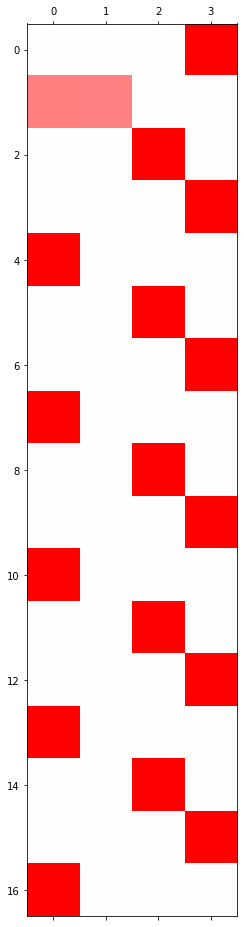

In [190]:
hidden, _ = lstm(x)
plt.matshow(soft(linr(hidden)).to("cpu").data,cmap='bwr',vmin=-1,vmax=1)

`-` 조각난 시계열로 학습한 경우는 hi!에서 hi?로 바뀔 수 없다. 왜냐햐면 그러한 연결정보가 끊어져 있으니까

## 재미있는 실험 

`-` x1만 배운다면? 

In [172]:
torch.manual_seed(43052) 
lstm = torch.nn.LSTM(4,10).to("cuda:0")
linr = torch.nn.Linear(10,4).to("cuda:0")

In [173]:
loss_fn = torch.nn.CrossEntropyLoss() 
optimizr = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)

In [175]:
for epoc in range(100):
    ## 1 
    hidden, _ = lstm(x1) 
    output = linr(hidden) 
    ## 2 
    loss = loss_fn(output,y1)
    ## 3 
    loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

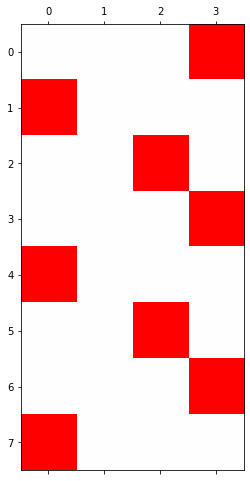

In [176]:
hidden, _ = lstm(x2)
plt.matshow(soft(linr(hidden)).to("cpu").data,cmap='bwr',vmin=-1,vmax=1)

`-` x2만 배운다면? 

In [191]:
torch.manual_seed(43052) 
lstm = torch.nn.LSTM(4,10).to("cuda:0")
linr = torch.nn.Linear(10,4).to("cuda:0")

In [192]:
loss_fn = torch.nn.CrossEntropyLoss() 
optimizr = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)

In [193]:
for epoc in range(100):
    ## 1 
    hidden, _ = lstm(x2) 
    output = linr(hidden) 
    ## 2 
    loss = loss_fn(output,y2)
    ## 3 
    loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

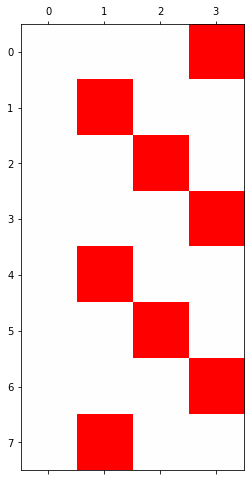

In [195]:
hidden, _ = lstm(x1)
plt.matshow(soft(linr(hidden)).to("cpu").data,cmap='bwr',vmin=-1,vmax=1)

# 똑같은 코드들 fastai, pytorch

## data: human numbers 5

In [196]:
txt = (['one',',','two',',','three',',','four',',','five',',']*100)[:-1]

In [197]:
mapping = {',':0, 'one':1, 'two':2, 'three':3, 'four':4, 'five':5} 
mapping

{',': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5}

In [198]:
txt_x = txt[:-1]
txt_y = txt[1:] 

In [199]:
txt_x[0:5], txt_y[0:5]

(['one', ',', 'two', ',', 'three'], [',', 'two', ',', 'three', ','])

In [200]:
x = torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float().to("cuda:0")
y = torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float().to("cuda:0")

## fastai 이용한 learn 

In [215]:
ds1 = torch.utils.data.TensorDataset(x,y)
ds2 = torch.utils.data.TensorDataset(x,y) # dummy 
dl1 = torch.utils.data.DataLoader(ds1,batch_size=998)
dl2 = torch.utils.data.DataLoader(ds2,batch_size=998) # dummy 
dls = DataLoaders(dl1,dl2) 

In [216]:
class MyLSTM(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(43052)
        self.lstm = torch.nn.LSTM(6,20)
        self.linr = torch.nn.Linear(20,6) 
    def forward(self,x):
        _water = torch.zeros(1,20).to("cuda:0")
        hidden, (hT,cT) =self.lstm(x,(_water,_water))
        output = self.linr(hidden)
        return output         

In [217]:
net = MyLSTM().to("cuda:0")
loss_fn = torch.nn.CrossEntropyLoss()

In [218]:
lrnr = Learner(dls,net,loss_fn,lr=0.1)

In [219]:
lrnr.fit(10)

epoch,train_loss,valid_loss,time
0,1.762846,1.502211,00:00
1,1.631212,1.620583,00:00
2,1.627597,1.443686,00:00
3,1.580216,1.368762,00:00
4,1.536200,1.307310,00:00
5,1.496099,1.216339,00:00
6,1.453670,1.113821,00:00
7,1.408125,1.019931,00:00
8,1.361426,0.941434,00:00
9,1.315507,0.884034,00:00


In [220]:
soft(lrnr.model(x)).data.to("cpu").numpy().round(3)

array([[0.935, 0.009, 0.015, 0.011, 0.016, 0.014],
       [0.133, 0.164, 0.242, 0.172, 0.141, 0.147],
       [0.982, 0.003, 0.004, 0.003, 0.004, 0.003],
       ...,
       [0.122, 0.171, 0.242, 0.174, 0.146, 0.144],
       [0.984, 0.003, 0.004, 0.002, 0.004, 0.003],
       [0.119, 0.172, 0.244, 0.175, 0.144, 0.145]], dtype=float32)

## torch를 이용한 learn 

In [230]:
torch.manual_seed(43052) 
lstm = torch.nn.LSTM(6,20).to("cuda:0") 
linr = torch.nn.Linear(20,6).to("cuda:0") 
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)

In [231]:
for epoc in range(10):
    ## 1 
    hidden, _ = lstm(x)
    output = linr(hidden) 
    ## 2 
    loss = loss_fn(output,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()     

In [232]:
hidden, _ = lstm(x)
output = linr(hidden) 
soft(output).data.to("cpu").numpy().round(3)

array([[0.935, 0.009, 0.015, 0.011, 0.016, 0.014],
       [0.133, 0.164, 0.242, 0.172, 0.141, 0.147],
       [0.982, 0.003, 0.004, 0.003, 0.004, 0.003],
       ...,
       [0.122, 0.171, 0.242, 0.174, 0.146, 0.144],
       [0.984, 0.003, 0.004, 0.002, 0.004, 0.003],
       [0.119, 0.172, 0.244, 0.175, 0.145, 0.145]], dtype=float32)

# human numbers 100

In [789]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DL2022/main/posts/IV.%20RNN/2022-11-25-human_numbers_100.csv')
df

,text
0,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thirty four, thirty five, thirty six, thirty seven, thirty eight, thirty nine, forty, forty one, forty two, forty three, forty four, forty five, forty six, forty seven, forty eight, forty nine, fifty, fifty one, fifty two, fifty three, fifty four, fifty five, fifty six, fifty seve..."
1,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thirty four, thirty five, thirty six, thirty seven, thirty eight, thirty nine, forty, forty one, forty two, forty three, forty four, forty five, forty six, forty seven, forty eight, forty nine, fifty, fifty one, fifty two, fifty three, fifty four, fifty five, fifty six, fifty seve..."
2,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thirty four, thirty five, thirty six, thirty seven, thirty eight, thirty nine, forty, forty one, forty two, forty three, forty four, forty five, forty six, forty seven, forty eight, forty nine, fifty, fifty one, fifty two, fifty three, fifty four, fifty five, fifty six, fifty seve..."
3,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thirty four, thirty five, thirty six, thirty seven, thirty eight, thirty nine, forty, forty one, forty two, forty three, forty four, forty five, forty six, forty seven, forty eight, forty nine, fifty, fifty one, fifty two, fifty three, fifty four, fifty five, fifty six, fifty seve..."
4,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thirty four, thirty five, thirty six, thirty seven, thirty eight, thirty nine, forty, forty one, forty two, forty three, forty four, forty five, forty six, forty seven, forty eight, forty nine, fifty, fifty one, fifty two, fifty three, fifty four, fifty five, fifty six, fifty seve..."
...,...
1995,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thirty four, thirty five, thirty six, thirty seven, thirty eight, thirty nine, forty, forty one, forty two, forty three, forty four, forty five, forty six, forty seven, forty eight, forty nine, fifty, fifty one, fifty two, fifty three, fifty four, fifty five, fifty six, fifty seve..."
1996,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thirty four, thirty five, thirty six, 

`(1)` TextDataLoaders.from_df을 이용하여 dls오브젝트를 만들어라. 
- is_lm = True 로 설정할 것 
- seq_len = 5 로 설정할 것 

(풀이)

In [791]:
dls = TextDataLoaders.from_df(df,is_lm=True,seq_len=5,text_col='text')
dls.show_batch()

,text,text_
0,"xxbos one , two ,","one , two , three"
1,"hundred xxbos one , two","xxbos one , two ,"
2,"one hundred xxbos one ,","hundred xxbos one , two"
3,", one hundred xxbos one","one hundred xxbos one ,"
4,"nine , one hundred xxbos",", one hundred xxbos one"
5,"ninety nine , one hundred","nine , one hundred xxbos"
6,", ninety nine , one","ninety nine , one hundred"
7,"eight , ninety nine ,",", ninety nine , one"
8,"ninety eight , ninety nine","eight , ninety nine ,"


`(2)` lrnr 오브젝트를 만들어라. 
- arch = AWD_LSTM 이용 
- metrics = accuracy 이용 

(풀이) 

In [51]:
lrnr = language_model_learner(dls, arch= AWD_LSTM, metrics=accuracy)

`(3)` lrnr오브젝트에서 fine_tune(3) 메소드를 이용하여 모형을 학습하라. 

(풀이)

In [53]:
lrnr.fine_tune(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.534681,0.168856,0.977650,00:49


epoch,train_loss,valid_loss,accuracy,time
0,0.018749,0.003256,0.999205,00:54
1,0.001580,0.002430,0.999324,00:54
2,0.000651,0.002244,0.999315,00:54


`(4)` 'one , two ,' 이후에 이어질 50개의 단어를 생성하라.

(풀이) 

In [56]:
lrnr.predict('one, two,', n_words=50) 

'one , two , three , four , five , six , seven , eight , nine , ten , eleven , twelve , thirteen , fourteen , fifteen , sixteen , seventeen , eighteen , nineteen , twenty , twenty one , twenty two , twenty three , twenty four , twenty five'

`(5)` 'twenty , twenty one , ' 이후에 이어질 50개의 단어를 생성하라. 

(풀이) 

In [57]:
lrnr.predict('twenty, twenty one,', n_words=50) 

'twenty , twenty one , twenty two , twenty three , twenty four , twenty five , twenty six , twenty seven , twenty eight , twenty nine , thirty , thirty one , thirty two , thirty three , thirty four , thirty five , thirty six , thirty seven , thirty eight ,'